### Dealing with Heterogeniety

This page is a reproducible work for Chapter 4.1 of Zuur et al. (2009). This particular example is useful to practice methods to address heterogeniety (heteroscedasticy) in linear regression models. 

One of the important assumptions in linear regression is "homeoscedasticy (homeogeneity) of variance", which means that the spread of dataset is same at each X values. (i.e. the spread of reponse is the same for along the range of predictor variable).

One way to deal with heterogeniety is 'a mean-variance stabilisng' transformation. 
Formal test for homeogeniety require normality of the data (e.g. Barlett's test). Zuur et al (2009) suggest assessing homoegeneity based on 'graphical inspection' of residuals (pp20).


Serious heterogeniety could cause major harm to invalidate the outcome of linear regression analysis. Ignoring such issue could leave the regression parameters with incorrect standard errors (Zuur et al. 2009), which leads to incorrect distribution of statistics (e.g., F / t statistic is no longer F / t distributed), thus harming statistical significance of the tests. 

With extra Mathematical effort, heterogeniety can be incorporated to models and can provide extra biological information (Zuur et al. 2009)

Starting with the squid data, our goal here is to model reproductive organ weight as the function of biotic and abiotic factors affecting sexual maturation, more specifically to determine the extent to which maturation is size-related (dorsal mantle length) and seasonal (month recorded). 

According to Zuur pp 73,

$Testisweight_{i}=intercept + DML_{i}+Month_{i} +DML_{i}:Month_{i}+ \varepsilon_{i}$

where
$\varepsilon_{i} \sim N(0,\sigma^2)$

Note that the notation ':' is for the interaction term of DML and Month.

In [3]:
source("src/HighstatLibV10.R")
library(nlme);library(dplyr)

Squid<-read.table("data/Squid.txt",header = TRUE)
Squid<-Squid%>%
      mutate(fMONTH=factor(MONTH))


Month is used as a nomial variable (with the function factor), and DML as a continuous variable.
Using linear model, the model:

$Testisweight_{i}=intercept + DML_{i}+Month_{i} +DML_{i}:Month_{i}+ \varepsilon_{i}$

where
$\varepsilon_{i} \sim N(0,\sigma^2)$

is plotted below in terms of residual spread by DML for each month.

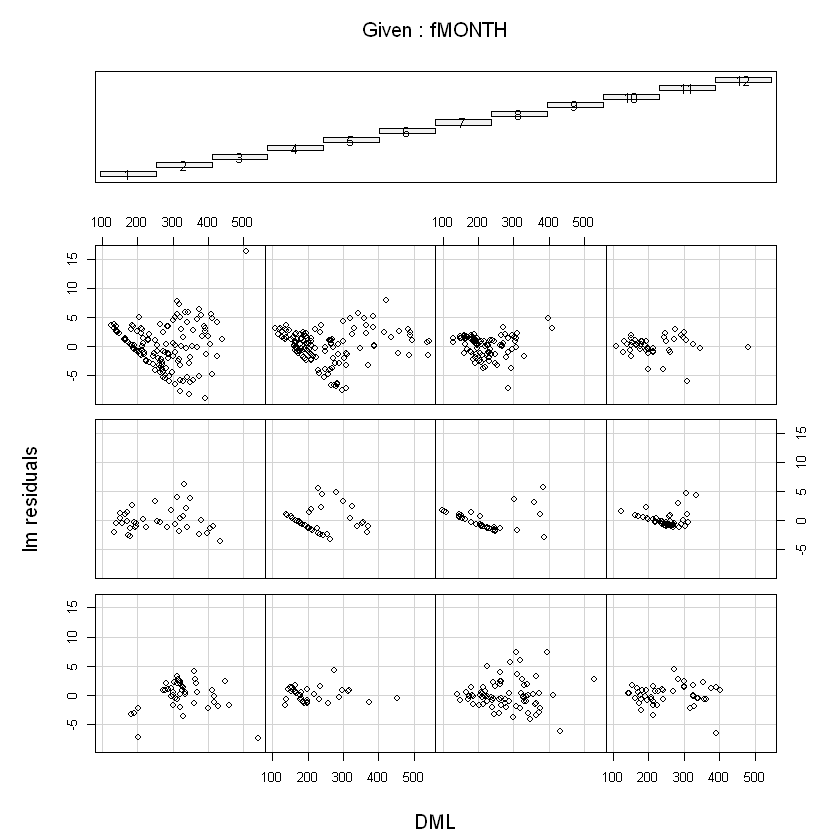

In [6]:
M1<- lm (Testisweight ~DML*fMONTH, data=Squid)
E0<-resid(M1)
coplot(E0~DML|fMONTH,ylab="lm residuals", data=Squid)

We could grpahically see that the variance of residuals along DML is not homogenious in this case. 
Same applys when the residuals are normalized with gls function:

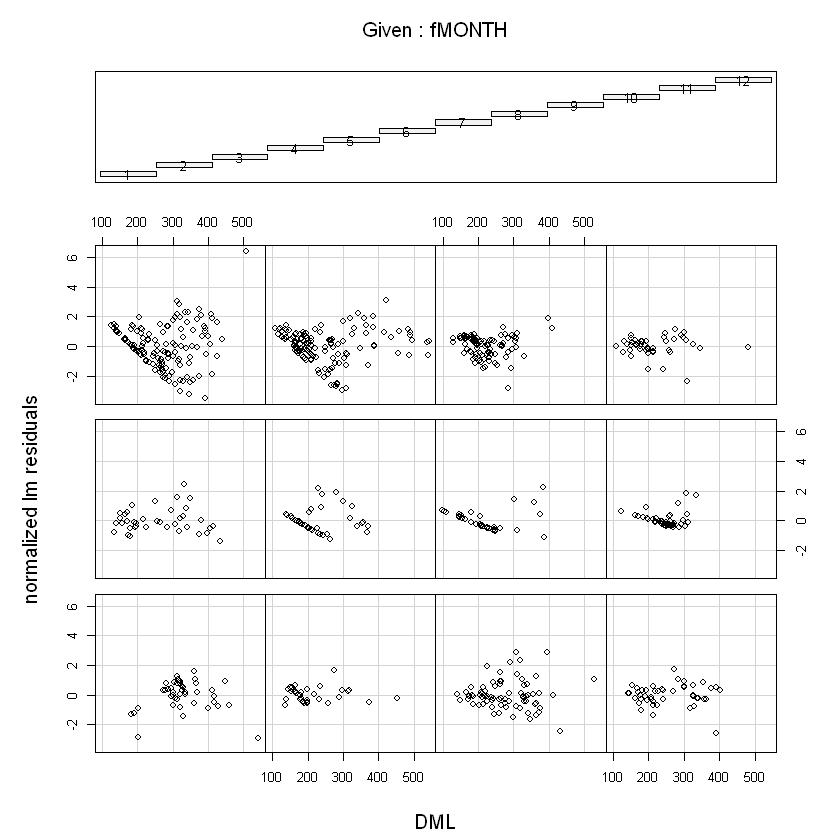

In [7]:
M1<-gls(Testisweight ~ DML*fMONTH, data=Squid)
E0_n<-resid(M1, type="normalized")
coplot(E0_n~DML|fMONTH,ylab="normalized lm residuals", data=Squid)

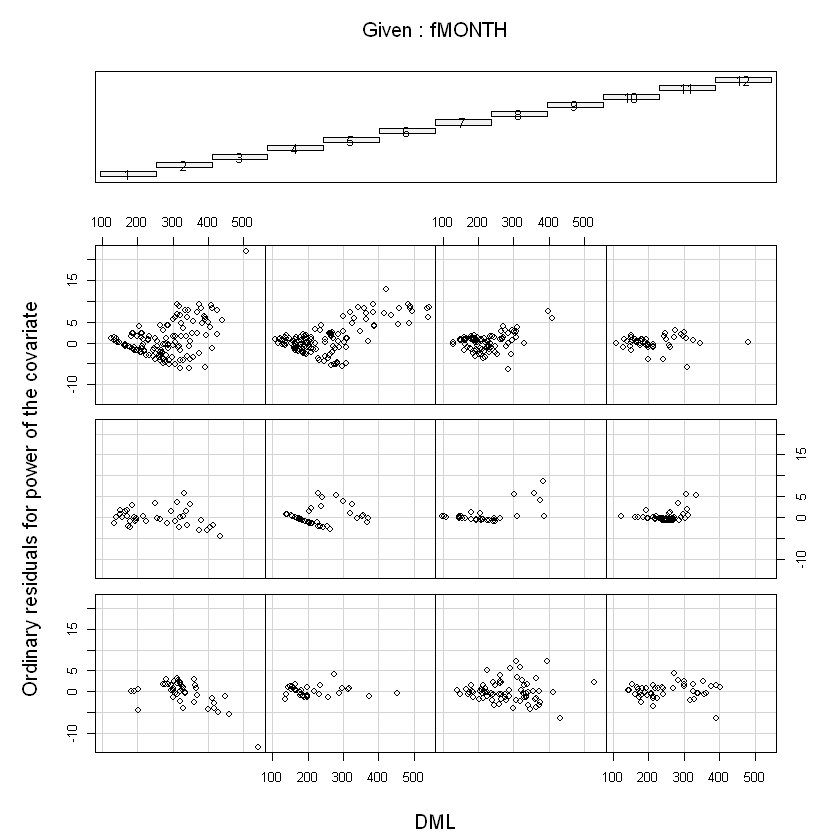

In [8]:
vf4<- varPower(form =~DML| fMONTH)
M.gls4<-gls(Testisweight ~ DML*fMONTH, data=Squid, weights=vf4)
E1<-resid(M.gls4)
coplot(E1~ DML | fMONTH, ylab ="Ordinary residuals for power of the covariate", data= Squid)

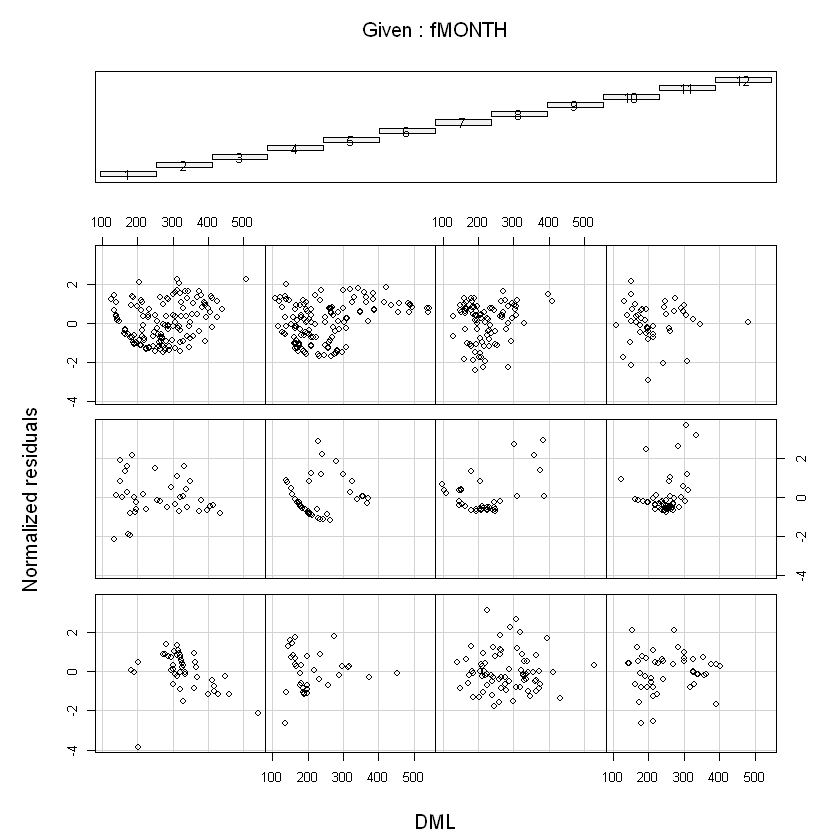

In [9]:
### Ordinary residuals
E2<-resid(M.gls4,type="normalized")
coplot(E2~ DML | fMONTH, ylab ="Normalized residuals", data= Squid)